In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp 

In [2]:
###### Initial Conditions ######
global_x0, global_y0, global_z0 = 15, 13, 10


n_trajectories = 5

initial_conditions = [
    [global_x0 + np.random.uniform(-1, 1), global_y0 + np.random.uniform(-1, 1), global_z0 + np.random.uniform(-1, 1)]
    for _ in range(n_trajectories)
]

In [3]:
sigma = 10
beta = 8/3
ro = 28


def Lorenz(t, point):
    
    x, y, z = point

    dx_dt = sigma*(y - x)
    dy_dt = (x*(ro - z)) - y
    dz_dt = (x*y) - (beta*z)
    
    return np.array([dx_dt, dy_dt, dz_dt])

In [4]:
num_t = 100
steps = 100_000

t = np.linspace(0., num_t, steps)



def euler(t, x0, y0, z0):
    
    values = [np.array([x0, y0, z0])]
    
    step_size = t[1] - t[0]
    
    for n in range(1, len(t)):
        
        prev_x = values[-1][0]
        prev_y = values[-1][1]
        prev_z = values[-1][2]
        # mu
        temp_val = values[-1] + Lorenz(step_size, [prev_x, prev_y, prev_z]) * step_size
        
        values.append(temp_val)
        
    return values


def agg_initials(initial_conditions):

    frames = {}

    for n, conds in enumerate(initial_conditions):

        temp_x0, temp_y0, temp_z0 = conds
        
        temp_vals = euler(t, temp_x0, temp_y0, temp_z0)

        temp_df = pd.DataFrame(temp_vals, columns = [f'x{n}', f'y{n}', f'z{n}'])
        
        frames[tuple(conds)] = temp_df

    concatenated_frames = pd.concat(frames.values(), axis = 1)

    x_cols = [col for col in concatenated_frames if 'x' in col]
    
    return concatenated_frames[x_cols]


system_step_data = agg_initials(initial_conditions = initial_conditions)

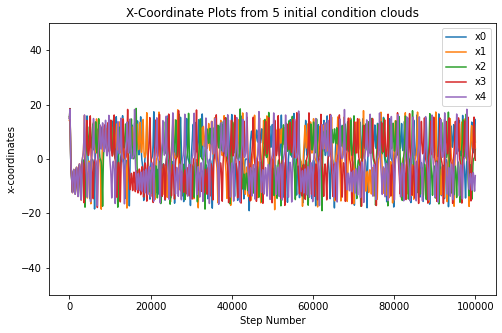

In [5]:
system_step_data.plot(ylim = (-50, 50), figsize = (8, 5))
plt.ylabel('x-coordinates')
plt.xlabel('Step Number')
plt.title(f'X-Coordinate Plots from {n_trajectories} initial condition clouds')

plt.show()

In [6]:
t_span = (0, 100)
t_eval = np.linspace(*t_span, 10_000)


lorenz_solutions = []
for conds in initial_conditions:
    sol = solve_ivp(Lorenz, t_span, conds, t_eval=t_eval)
    lorenz_solutions.append(sol.y)

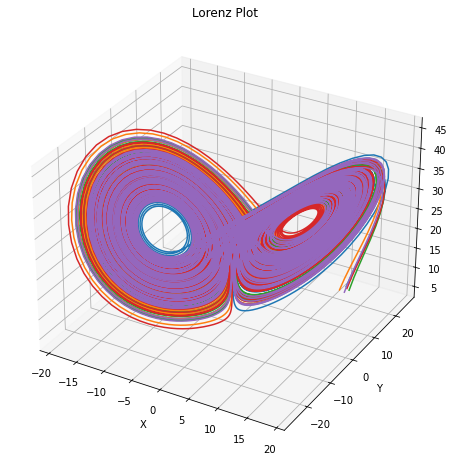

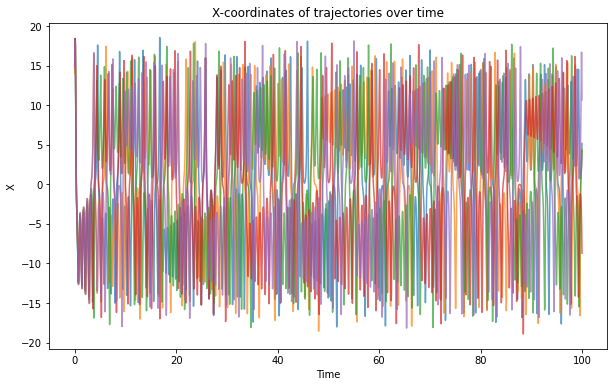

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


for solution in lorenz_solutions:
    x_coord, y_coord, z_coord = solution
    ax.plot(x_coord, y_coord, z_coord)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Plot')


plt.figure(figsize=(10, 6))
for solution in lorenz_solutions:
    x_coord, y_coord, z_coord = solution
    plt.plot(t_eval, x_coord, alpha=0.7)

plt.xlabel('Time')
plt.ylabel('X')
plt.title('X-coordinates of trajectories over time')
plt.show()

In [8]:
large_global_x0, large_global_y0, large_global_z0 = 150, 105, 120

large_initial_conditions = [
    [large_global_x0 + np.random.uniform(-1, 1), large_global_y0 + np.random.uniform(-1, 1), large_global_z0 + np.random.uniform(-1, 1)]
    for _ in range(n_trajectories)
]

t_span = (0, 100)
t_eval = np.linspace(*t_span, 10_000)


large_lorenz_solutions = []
for conds in large_initial_conditions:
    sol = solve_ivp(Lorenz, t_span, conds, t_eval=t_eval)
    large_lorenz_solutions.append(sol.y)

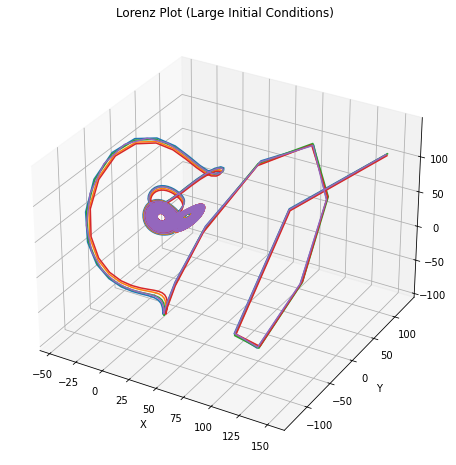

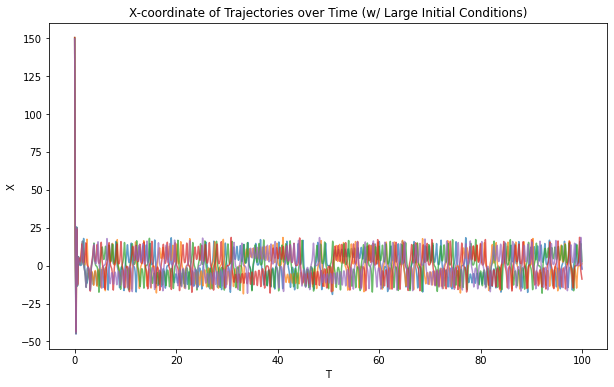

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


for large_solution in large_lorenz_solutions:

    x_coord, y_coord, z_coord = large_solution
    
    ax.plot(x_coord, y_coord, z_coord)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Plot (Large Initial Conditions)')


plt.figure(figsize=(10, 6))
for large_solution in large_lorenz_solutions:
    x_coord, y_coord, z_coord = large_solution
    plt.plot(t_eval, x_coord, alpha=0.7)

plt.xlabel('T')
plt.ylabel('X')
plt.title('X-coordinate of Trajectories over Time (w/ Large Initial Conditions)')
plt.show()